In [84]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

In [85]:
model=tf.keras.models.load_model("C:\\Users\\acer\\Desktop\\Suretrust\\veg_pred.h5")
classes = [
    "Bean",
    "Bitter_Gourd",
    "Bottle_Gourd",
    "Brinjal",
    "Broccoli",
    "Cabbage",
    "Capsicum",
    "Carrot",
    "Cauliflower",
    "Cucumber",
    "Papaya",
    "Potato",
    "Pumpkin",
    "Radish",
    "Tomato"

]


In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 12)        336       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 12)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 24)        2616      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 24)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          10416     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        

In [88]:
def Pred(final):
  img = Image.open(final)
  img = img.resize((32,32))
  test = tf.reshape(tf.constant(np.array(img)/255), (-1,32,32,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  print("The predicted vegetable is", pred.title() ,"and my confidence is", int(confidence))


In [94]:
Pred("C:\\Users\\acer\\Desktop\\Suretrust\\Vegetable Images\\test\\Brinjal\\0871.jpg")

The predicted vegetable is Brinjal and my confidence is 27


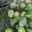

In [95]:
img=Image.open("C:\\Users\\acer\\Desktop\\Suretrust\\Vegetable Images\\test\\Brinjal\\0871.jpg")
img=img.resize((32,32))
img